In [1]:
code = 'ef1b3446ecd3ead361c22dc7c310f3a8ddf93ccc'
print(code)

ef1b3446ecd3ead361c22dc7c310f3a8ddf93ccc


In [2]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "57098",
    'client_secret': '3d0135bcb98b14e1cd9e7b78ae9d7eb219e5b312',
    'refresh_token': 'f2800ccb3242eb26a315f3c16d91ef84b94827df',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
print(res)
print(res.json())
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

print(my_dataset[0]["name"])
print(my_dataset[0]["map"]["summary_polyline"])

Requesting Token...

<Response [200]>
{'token_type': 'Bearer', 'access_token': '47596d5803ce9574820eaca1d1d2ca251fa55ce7', 'expires_at': 1617992854, 'expires_in': 21600, 'refresh_token': 'f2800ccb3242eb26a315f3c16d91ef84b94827df'}
Access Token = 47596d5803ce9574820eaca1d1d2ca251fa55ce7

Initiation Parkour
None


In [3]:
#Pandas will be the backbone of our data manipulation.
import pandas as pd
from pandas.io.json import json_normalize
#Seaborn is a data visualization library.
import seaborn as sns
#Matplotlib is a data visualization library. 
#Seaborn is actually built on top of Matplotlib. 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#Numpy will help us handle some work with arrays.
import numpy as np
#Datetime will allow Python to recognize dates as dates, not strings.
from datetime import datetime

In [4]:
activities = json_normalize(my_dataset)
print(activities)

     resource_state                                      name  distance  \
0                 2                        Initiation Parkour       0.0   
1                 2              Première sortie avec le père   63291.3   
2                 2                           Petite riboucle    7213.5   
3                 2  Insanity #17 - plyometric cardio circuit       0.0   
4                 2                     Course à pied du midi   10048.5   
..              ...                                       ...       ...   
187               2                  Course d’avant raclette     3455.4   
188               2                  Ça part à l’entraînement    1228.0   
189               2                         Anniv de la maman    8616.3   
190               2                              Retour Perou    8251.3   
191               2                        Huacachina - Perou    4807.2   

     moving_time  elapsed_time  total_elevation_gain     type          id  \
0          10800      

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [5]:
activities.columns #See a list of all columns in the table

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'id', 'external_id', 'upload_id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'start_latlng', 'end_latlng', 'location_city', 'location_state',
       'location_country', 'start_latitude', 'start_longitude',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'from_accepted_tag', 'average_speed', 'max_speed',
       'has_heartrate', 'heartrate_opt_out', 'display_hide_heartrate_option',
       'pr_count', 'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state', 'workout_type', 'upload_id_str', 'average_watts',
       'kilojoules', 'device_watts', 'elev_high', 'elev_low',
       'average_heartrate', 'max_heartrate'],
      dtype=

In [6]:
activities.shape #See the dimensions of the table.

(192, 56)

In [7]:
#Create new dataframe with only columns I care about
cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
         'average_speed', 'max_speed','total_elevation_gain',
         'start_date_local']
activities = activities[cols]#Break date into start time and date
activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
activities['start_time'] = activities['start_date_local'].dt.time
activities['start_date_local'] = activities['start_date_local'].dt.date
activities.head(5)

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time
0,Initiation Parkour,NaN,Workout,0.0,10800,0.000,0.0,0.0,2021-04-08,14:30:27
1,Première sortie avec le père,5.422150e+09,Ride,63291.3,8409,7.527,14.7,497.5,2021-04-07,16:49:06
2,Petite riboucle,5.419588e+09,Hike,7213.5,6476,1.114,3.4,64.6,2021-04-07,09:12:59
3,Insanity #17 - plyometric cardio circuit,5.413889e+09,Workout,0.0,2513,0.000,0.0,0.0,2021-04-06,11:03:34
4,Course à pied du midi,5.402076e+09,Run,10048.5,2800,3.589,11.3,66.1,2021-04-04,12:13:43


Visualizations

Now that I have the data I want I’m ready to start doing some visualization and analysis. I rarely worry about manipulating the data too much ahead of time. If I have a question I want to answer and that requires me to manipulate my data in someway, I will do it then.


In [8]:
runs = activities.loc[activities['type'] == 'Run']
print(runs)

                                        name     upload_id type  distance  \
4                      Course à pied du midi  5.402076e+09  Run   10048.5   
6    Insanity #16 - cardio power resistance            NaN  Run       0.0   
8                  Reprise avec nouvelles 👟   5.383863e+09  Run    8036.6   
22                           Coaching aleks   5.285463e+09  Run    3211.6   
24                          En plein vent 💨   5.263409e+09  Run    6139.1   
..                                       ...           ...  ...       ...   
187                 Course d’avant raclette   2.897834e+09  Run    3455.4   
188                 Ça part à l’entraînement  2.880392e+09  Run    1228.0   
189                        Anniv de la maman  2.903977e+09  Run    8616.3   
190                             Retour Perou  2.903975e+09  Run    8251.3   
191                       Huacachina - Perou  2.903982e+09  Run    4807.2   

     moving_time  average_speed  max_speed  total_elevation_gain  \
4      

Is there a relationship between how far I run and my average speed?


Text(0.5, 1.0, 'Max speed vs Distance')

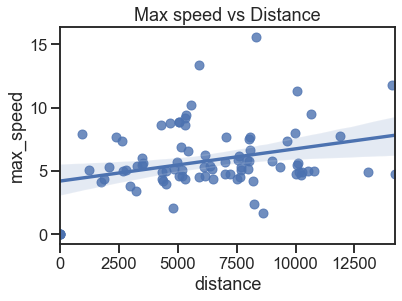

In [9]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'max_speed', data = runs).set_title("Max speed vs Distance")

Text(0.5, 1.0, 'Average Speed vs Distance')

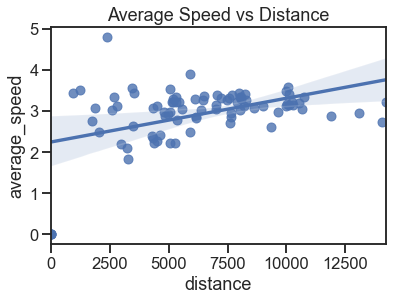

In [10]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'average_speed', data = runs).set_title("Average Speed vs Distance")

have I started running faster, on average, over the past few months?

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


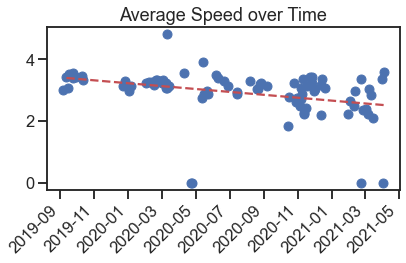

In [11]:
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(runs.start_date_local)  #convert data to numpy array
y = np.asarray(runs.average_speed)
ax1.plot_date(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')
#ax1.set_ylim([0,5])

#add trend line
#print(x)
type(x)
x2=pd.to_datetime(x).astype(np.int64)
#x2 = plt.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

Nombre de kilomètre par semaine

In [12]:
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange, MonthLocator, WeekdayLocator, num2date, date2num)

In [13]:
runs.start_date_local= pd.to_datetime(runs.start_date_local)
runs=runs.assign(dayofyear=runs['start_date_local'].dt.dayofyear)
runs=runs.assign(weekofyear=runs['start_date_local'].dt.weekofyear)
runs=runs.assign(year=runs['start_date_local'].dt.year)
#dy=runs['start_date_local'].dt.dayofyear
#yw=runs['start_date_local'].dt.weekofyear
#y=runs['start_date_local'].dt.year
print(runs)

                                        name     upload_id type  distance  \
4                      Course à pied du midi  5.402076e+09  Run   10048.5   
6    Insanity #16 - cardio power resistance            NaN  Run       0.0   
8                  Reprise avec nouvelles 👟   5.383863e+09  Run    8036.6   
22                           Coaching aleks   5.285463e+09  Run    3211.6   
24                          En plein vent 💨   5.263409e+09  Run    6139.1   
..                                       ...           ...  ...       ...   
187                 Course d’avant raclette   2.897834e+09  Run    3455.4   
188                 Ça part à l’entraînement  2.880392e+09  Run    1228.0   
189                        Anniv de la maman  2.903977e+09  Run    8616.3   
190                             Retour Perou  2.903975e+09  Run    8251.3   
191                       Huacachina - Perou  2.903982e+09  Run    4807.2   

     moving_time  average_speed  max_speed  total_elevation_gain  \
4      

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Week vs Speed')

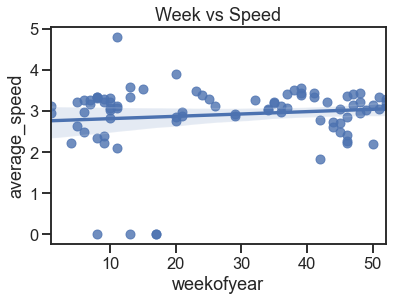

In [14]:
sns.set(style="ticks", context="talk")
sns.regplot(x='weekofyear', y = 'average_speed', data = runs).set_title("Week vs Speed")

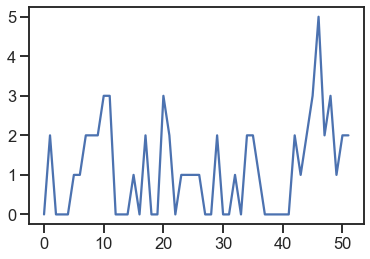

In [15]:
Y=2020;
#print(runs[runs.year==Y])
R=runs[runs.year==Y];
# compter le nombre de sorties par semaine
NbSortieperWeek= np.zeros((52,1));
#print(NbSortieperWeek)
for ii in range(0,52):
    NbSortieperWeek[ii]=len(R[R.weekofyear==ii]);

# plot the figure
fig, ax = plt.subplots()
plt.plot(range(0,52), NbSortieperWeek,label='sorties/semaine')

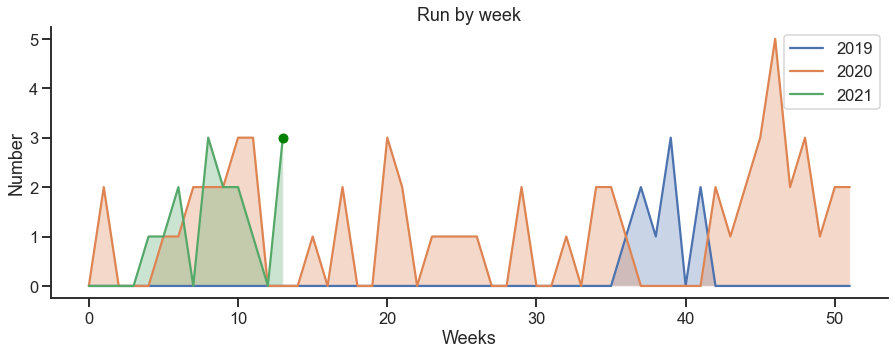

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
Y=[2019,2020,2021];

# Number of the current week
a = datetime.now()
cw = a.isocalendar()[1]
cy = a.isocalendar()[0]

for yy in Y:
    R=runs[runs.year==yy];
    # compter le nombre de sorties par semaine
    if yy==cy:
        Nw = cw
    else :
        Nw = 52
        
    NbSortieperWeek= np.zeros((Nw,1));
    for ii in range(0,Nw):
        NbSortieperWeek[ii]=len(R[R.weekofyear==ii]);
    # plot the figure
    plt.plot(range(0,Nw), NbSortieperWeek,label=yy)
    plt.fill_between(range(0,Nw), np.squeeze(NbSortieperWeek),alpha=0.30)

l=len(NbSortieperWeek)
plt.plot(Nw-1,NbSortieperWeek[l-1],'o',color='green')
    
plt.xlabel('Weeks')
plt.ylabel('Number')
plt.title('Run by week')
plt.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

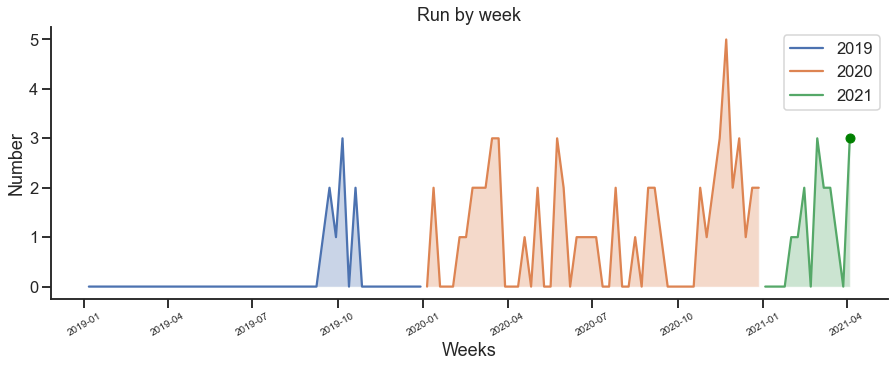

In [17]:
#V2
fig2, ax2 = plt.subplots(figsize=(15,5))
Y=[2019,2020,2021];

# Number of the current week
a = datetime.now()
cw = a.isocalendar()[1]
cy = a.isocalendar()[0]

for yy in Y:
    R=runs[runs.year==yy];
    # compter le nombre de sorties par semaine
    if yy==cy: # si la sortie est jusqu'à maintenant
        Nw = cw
    else :
        Nw = 52
        
    NbSortieperWeek= np.zeros((Nw,1));
    dateList = []
    for ii in range(0,Nw):
        NbSortieperWeek[ii]=len(R[R.weekofyear==ii]);
        mydate=datetime.strptime( str(yy)+' '+ str(ii) + ' 0', "%Y %W %w") # je compte le dimanche le nombre d'activité de la semaine
        #print(mydate)
        #print(NbSortieperWeek[ii])
        dateList.append(mydate)
    # plot the figure
    plt.plot_date(dateList,NbSortieperWeek,label=yy,ls='-',ms=0,fillstyle='full')
    plt.fill_between(dateList, np.squeeze(NbSortieperWeek),alpha=0.30)

l=len(dateList)
plt.plot_date(dateList[l-1],NbSortieperWeek[l-1],'o',color='green')
    
plt.xlabel('Weeks')
plt.ylabel('Number')
plt.title('Run by week')
plt.legend()

ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.axis_name = 'Date'
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

month_day_fmt = mdates.DateFormatter('%b %d') # "Locale's abbreviated month name. + day of the month"
ax.xaxis.set_major_formatter(month_day_fmt)


#locs, labels = plt.xticks()
#myDates = ""
#d = datetime.strptime(myDate + ' 0', "%Y %W %w")
#r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
#plt.xticks(locs, ('', 'Dick', 'Harry', 'Sally', 'Sue'))
#plt.xlim([0,52])
plt.show()


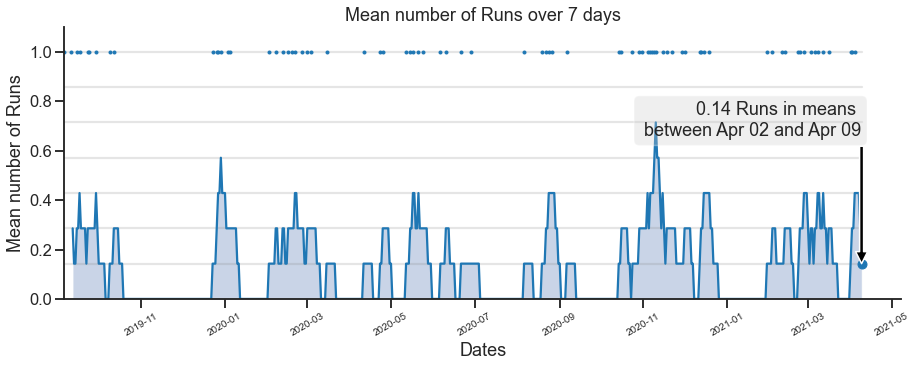

In [18]:
#V2.1
fig2, ax2 = plt.subplots(figsize=(15,5))
Y=[2019,2020,2021];

# Number of the current week
a = datetime.now()
#print(a)
cw = a.isocalendar()[1] # current week
cy = a.isocalendar()[0] # current year
cd = a.timetuple().tm_yday # current day

R2019 = runs[runs.year==Y[0]]
firstdate = min(R2019.start_date_local)
firstdate.to_pydatetime()
#rint(timestamp)

Vector_dates=pd.date_range(start=firstdate, end=a )
#rint(Vector_dates[1])

A = np.zeros((len(Vector_dates)));
D = runs.start_date_local;
D = D.to_numpy()

for ii in range(0,len(A)):
    boolean= D == Vector_dates[ii].to_numpy()
    ind = np.where(boolean)
    if ind[0].size==1:
        A[ii]=1

def moving_average(x, w):
    #modes = ['full', 'same', 'valid']
    return np.convolve(x, np.ones(w)/ w, 'valid') ; # moyenne avec les jours complets avec une fenetre décentrée.

A_ma= moving_average(A, 7)

# tracer les septièmes 1/7, 2/7, etc ...
for ii in range(1,8):
    plt.plot_date(Vector_dates[0:len(A)],ii/7*np.ones(len(A)),ls='-',ms=0,fillstyle='full',color='gray',alpha=0.2)
    
deb=(len(A)-len(A_ma));
    
plt.plot_date(Vector_dates[deb:len(A)],A_ma,ls='-',ms=0,fillstyle='full',color='tab:blue')
plt.fill_between(Vector_dates[deb:len(A)],A_ma,alpha=0.30)
plt.plot_date(Vector_dates[A!=0],A[A!=0],ms=3,fillstyle='full',color='tab:blue')


ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.axis_name = 'Date'
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel('Dates');
plt.ylabel('Mean number of Runs');
plt.title('Mean number of Runs over 7 days');
plt.xlim(Vector_dates[0])
plt.ylim(0,1.1)

x_a=Vector_dates[len(A)-1];
y_a=A_ma[len(A_ma)-1];

Annotation=str(round(y_a,2)) +' Runs in means \n over the past 7 days'

#print(x_a.strftime("%b %d"))
x_a_prev=(x_a.to_numpy()-np.timedelta64(7,'D'))
x_a_prev2 = pd.Timestamp(x_a_prev)         
#print(x_a_prev2)
#print((x_a - datetime.timedelta(days=7)).date())
#Annotation=str(round(y_a,2)) +' km in means \n over the past 7 days';
#print(x_a_prev2.strftime("%b %d"))
Annotation=str(round(y_a,2)) +' Runs in means \n between ' + x_a_prev2.strftime("%b %d") + ' and ' + x_a.strftime("%b %d") ;

bbox_args = dict(boxstyle="round", fc="0.8",alpha=0.3)

ax2.annotate(Annotation, xy=(x_a, y_a), xytext=(x_a, 0.8),
            ha="right", va="top",
            bbox=bbox_args,
            arrowprops=dict(facecolor='black',shrink=0))#width=1,headwidth=1
plt.plot_date(x_a,y_a,'o',color='tab:blue');

outpath='C:/Users/ppuchaud/Documents/Python/StravaData/Resultats/MeansRuns' + x_a.strftime("%Y%b%d") +'.png';
plt.savefig(outpath)

In [19]:
# Comprehension moyenne glissante.
XX=np.array([1, 2, 3, 4, 5, 6, 7 , 8, 9 ]);
w=7;
print( np.convolve(XX, np.ones(w)/ w, 'full') )
print( np.convolve(XX, np.ones(w)/ w, 'same') )
print( np.convolve(XX, np.ones(w)/ w, 'valid') )

[0.14285714 0.42857143 0.85714286 1.42857143 2.14285714 3.
 4.         5.         6.         5.57142857 5.         4.28571429
 3.42857143 2.42857143 1.28571429]
[1.42857143 2.14285714 3.         4.         5.         6.
 5.57142857 5.         4.28571429]
[4. 5. 6.]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


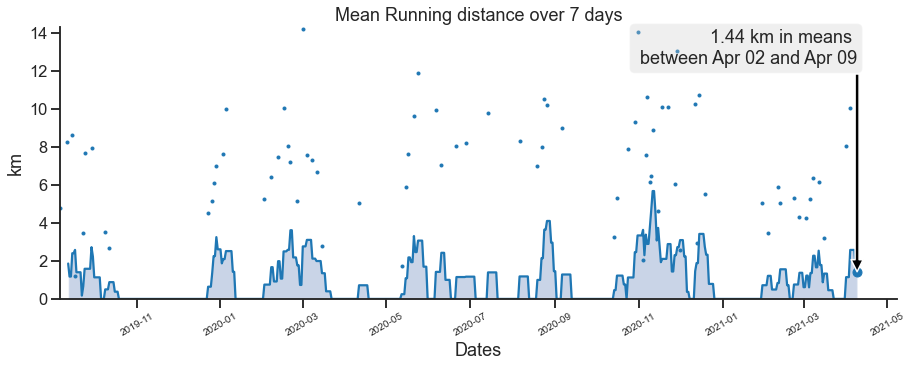

In [20]:
#V2.1
fig2, ax2 = plt.subplots(figsize=(15,5))
Y=[2019,2020,2021];

# Number of the current week
a = datetime.now()
#print(a)
cw = a.isocalendar()[1] # current week
cy = a.isocalendar()[0] # current year
cd = a.timetuple().tm_yday # current day

R2019 = runs[runs.year==Y[0]]
firstdate = min(R2019.start_date_local)
firstdate.to_pydatetime()
D = runs.start_date_local;
D = D.to_numpy()
#rint(timestamp)

Vector_dates=pd.date_range(start=firstdate, end=a )
A1 = np.zeros((len(Vector_dates)));
A2 = np.zeros((len(Vector_dates)));
dist = runs.distance.to_numpy()/1000;
vel =  runs.average_speed.to_numpy();
for ii in range(0,len(A)):
    boolean= D == Vector_dates[ii].to_numpy()
    ind = np.where(boolean)
    #print(np.size(ind))
    if np.size(ind)==1:
        A1[ii]=dist[ind[0]];
        A2[ii]=1/(vel[ind[0]]*0.060); #minutes for one km
    elif np.size(ind)>1:
        A1[ii]=sum(dist[ind]);
        x=1./(vel[ind]*0.060)
        A2[ii]=np.convolve(x, dist[ind]/A1[ii], 'valid') #vitesse: moyenne pondérée par la distance
        
def moving_average(x, w):
    #modes = ['full', 'same', 'valid']
    return np.convolve(x, np.ones(w)/ w, 'valid') ; # moyenne avec les jours complets avec une fenetre décentrée.

A_ma= moving_average(A1, 7)
A2_ma = moving_average(A2, 7)

deb=(len(A)-len(A_ma));
    
plt.plot_date(Vector_dates[deb:len(A)],A_ma,ls='-',ms=0,fillstyle='full',color='tab:blue')
plt.fill_between(Vector_dates[deb:len(A)],A_ma,alpha=0.30)
plt.plot_date(Vector_dates[A1!=0],A1[A1!=0],ms=3,fillstyle='full',color='tab:blue')
plt.plot_date(Vector_dates[len(A)-1],A_ma[len(A_ma)-1],'o',color='tab:blue');

ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.axis_name = 'Date'
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel('Dates');
plt.ylabel('km');
plt.title('Mean Running distance over 7 days');
plt.xlim(Vector_dates[0])
plt.ylim(0,max(A1)+0.1)

x_a=Vector_dates[len(A)-1];
y_a=A_ma[len(A_ma)-1];

Annotation=str(round(y_a,2)) +' Runs in means \n over the past 7 days'

#print(x_a.strftime("%b %d"))
x_a_prev=(x_a.to_numpy()-np.timedelta64(7,'D'))
x_a_prev2 = pd.Timestamp(x_a_prev)         
#print(x_a_prev2)
#print((x_a - datetime.timedelta(days=7)).date())
#Annotation=str(round(y_a,2)) +' km in means \n over the past 7 days';
#print(x_a_prev2.strftime("%b %d"))
Annotation=str(round(y_a,2)) +' km in means \n between ' + x_a_prev2.strftime("%b %d") + ' and ' + x_a.strftime("%b %d") ;
bbox_args = dict(boxstyle="round", fc="0.8",alpha=0.3);

ax2.annotate(Annotation, xy=(x_a, y_a), xytext=(x_a, max(A1)),
            ha="right", va="top",
            bbox=bbox_args,
            arrowprops=dict(facecolor='black',shrink=0));#width=1,headwidth=1

outpath='C:/Users/ppuchaud/Documents/Python/StravaData/Resultats/Meanskm' + x_a.strftime("%Y%b%d") +'.png';
plt.savefig(outpath)

#fig3, ax3 = plt.subplots(figsize=(15,5))

#plt.plot_date(Vector_dates[0:len(A2_ma)],A2_ma,ls='-',ms=0,fillstyle='full')
#plt.fill_between(Vector_dates[0:len(A2_ma)],A2_ma,alpha=0.30)
#plt.plot_date(Vector_dates[A2!=0],A2[A2!=0],ms=3,fillstyle='full',color='tab:blue')
#plt.plot_date(Vector_dates[len(A2_ma)-1],A2_ma[len(A2_ma)-1],'o',color='tab:blue');

#ax3.xaxis.set_tick_params(rotation=30, labelsize=10)
#ax3.xaxis.axis_name = 'Date'
#ax3.spines["top"].set_visible(False);
#ax3.spines["right"].set_visible(False);

#plt.xlabel('Dates');
#plt.ylabel('Velocity (min/km)')
#plt.title('Mean velocity over 7 days')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


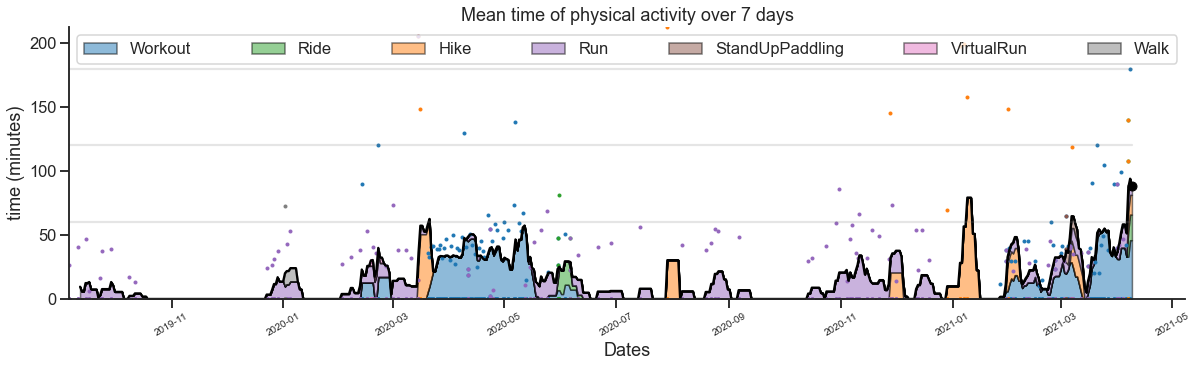

In [21]:
#temps par activités
fig2, ax2 = plt.subplots(figsize=(20,5))
Y=[2019,2020,2021];

#liste of type of activities
list_a = activities['type'].unique()

# Number of the current week
a = datetime.now()
#print(a)
cw = a.isocalendar()[1] # current week
cy = a.isocalendar()[0] # current year
cd = a.timetuple().tm_yday # current day

# date de la premiere activite
firstdate=a;
firstdate = min(activities.start_date_local)
#print(firstdate)
#firstdate.to_pydatetime()
#print(firstdate)

Vector_dates=pd.date_range(start=firstdate, end=a)
A = np.zeros([len(Vector_dates),len(list_a)])

for kk,jj in zip(range(0,len(list_a)),list_a):
    #print(jj)
    #print(activities)
    Act = activities.loc[activities['type'] == jj]
    #print(Act)
    Act.start_date_local= pd.to_datetime(Act.start_date_local)
    
    D = Act.start_date_local;
    D = D.to_numpy()
    
    #print(Act)
    time = Act.moving_time.to_numpy()/60;  #en minute
    #print(time)
    #print(D)
    for ii in range(0,len(A)):
        boolean= D == Vector_dates[ii].to_numpy()
        ind = np.where(boolean)
        #print(np.size(ind))
        if np.size(ind)==1:
            A[ii,kk]=time[ind[0]];
        elif np.size(ind)>1:
            A[ii,kk]=sum(time[ind]);
    

def moving_average(x, w):
    #modes = ['full', 'same', 'valid']
    s= x.shape; #print(s)
    
    for ii in range(0,s[1]):
        res=np.convolve(x[:,ii], np.ones(w)/ w, 'valid') ; # moyenne avec les jours complets avec une fenetre décentrée.
        if ii==0:            
            X=np.zeros([len(res),s[1]])
        X[:,ii]=res
        
    return X

A_ma= moving_average(A, 7)

#print(A_ma.shape)    

deb=(len(A)-len(A_ma));

#print(Vector_dates[deb:len(A)])
#'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive'
#print(list_a)
Colors=['tab:blue','tab:green','tab:orange','tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

for kk in range(0,len(list_a)):
    cur_A=A[:,kk]
    plt.plot_date(Vector_dates[cur_A!=0],A[cur_A!=0],ms=3,fillstyle='full',color=Colors[kk],alpha=1)


h=plt.stackplot(Vector_dates[deb:len(A)],np.transpose(A_ma[:,:]), labels=list_a, colors = Colors, alpha=0.5,linestyle='-',edgecolor="black")
plt.legend(h,list_a,loc='upper center',mode="expand",ncol=len(list_a))

A_tot=np.sum(A_ma,axis=1) #(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
plt.plot_date(Vector_dates[deb:len(A)],A_tot,ls='-',ms=0,fillstyle='full', color = "black")
plt.plot_date(Vector_dates[len(A)-1],A_tot[len(A_ma)-1],'o',color="black");
    
ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.axis_name = 'Date'
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel('Dates')
plt.ylabel('time (minutes)')
plt.title('Mean time of physical activity over 7 days')
plt.xlim(Vector_dates[0])
plt.ylim(0,np.max(A)+0.1)

# tracer les heures (60,120,180) ...
for ii in range(1,4):
    plt.plot_date(Vector_dates[0:len(A)],60*ii*np.ones(len(A)),ls='-',ms=0,fillstyle='full',color='gray',alpha=0.2)
    

x_a=Vector_dates[len(A)-1];
y_a=A_ma[len(A_ma)-1,:];
y_a_round=np.round(y_a,2)
#Annotation=str(round(y_a,2)) +' Runs in means \n over the past 7 days'

#print(x_a.strftime("%b %d"))
x_a_prev=(x_a.to_numpy()-np.timedelta64(7,'D'))
x_a_prev2 = pd.Timestamp(x_a_prev)  

string=str()
for kk,jj in zip(range(0,len(list_a)),list_a):
    if y_a_round[kk]!=0:
        #print(y_a_round[kk])
        string = str(string + ' ' + str(y_a_round[kk]) + ' min of ' + jj + ',\n')
            
#ajouter l'annotation !!!
#ax2.annotate(Annotation, xy=(x_a, y_a), xytext=(x_a, 0.75*np.max(A)),
#            ha="right", va="top",
#            bbox=bbox_args,
#            arrowprops=dict(facecolor='black',shrink=0,width=2,headwidth=2.5));#
#outpath='C:/Users/ppuchaud/Documents/Python/StravaData/Resultats/Meanskm' + x_a.strftime("%Y%b%d") +'.png';
#plt.savefig(outpath)

#fig3, ax3 = plt.subplots(figsize=(15,5))

#plt.plot_date(Vector_dates[0:len(A2_ma)],A2_ma,ls='-',ms=0,fillstyle='full')
#plt.fill_between(Vector_dates[0:len(A2_ma)],A2_ma,alpha=0.30)
#plt.plot_date(Vector_dates[A2!=0],A2[A2!=0],ms=3,fillstyle='full',color='tab:blue')
#plt.plot_date(Vector_dates[len(A2_ma)-1],A2_ma[len(A2_ma)-1],'o',color='tab:blue');

#ax3.xaxis.set_tick_params(rotation=30, labelsize=10)
#ax3.xaxis.axis_name = 'Date'
#ax3.spines["top"].set_visible(False);
#ax3.spines["right"].set_visible(False);

#plt.xlabel('Dates');
#plt.ylabel('Velocity (min/km)')
#plt.title('Mean velocity over 7 days')

2019-01-06 00:00:00
2020-01-05 00:00:00
2021-01-03 00:00:00


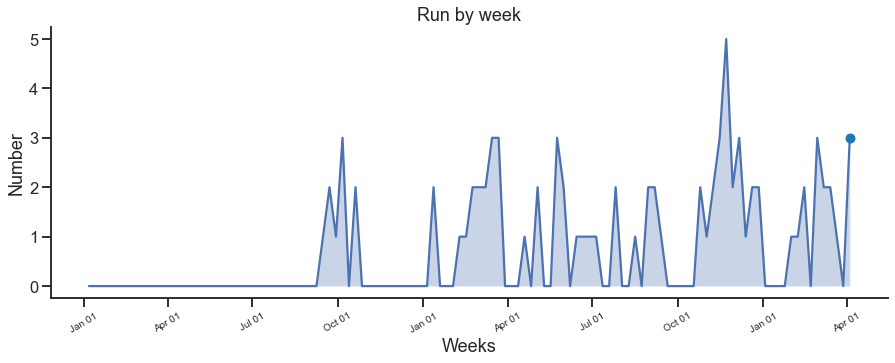

In [22]:
#V3
fig3, ax3 = plt.subplots(figsize=(15,5))
Y=[2019,2020,2021];

# Number of the current week
a = datetime.now()
cw = a.isocalendar()[1]
cy = a.isocalendar()[0]

NbSortieperWeek= [];
dateList = []
for yy in Y:
    R=runs[runs.year==yy];
    # compter le nombre de sorties par semaine
    if yy==cy:
        Nw = cw
    else :
        Nw = 52 
    
    for ii in range(0,Nw):
        NbSortieperWeek.append(len(R[R.weekofyear==ii])); #compt the number of runs
        if ii==0:
            print(datetime.strptime( str(yy)+' '+ str(ii) + ' 0', "%Y %W %w"))
        mydate=datetime.strptime( str(yy)+' '+ str(ii) + ' 0', "%Y %W %w") # vérifier cette histoire de zero
        dateList.append(mydate)

# plot the figure
plt.plot_date(dateList,NbSortieperWeek,ls='-',ms=0,fillstyle='full')
plt.fill_between(dateList, np.squeeze(NbSortieperWeek),alpha=0.30)

l=len(dateList)
plt.plot_date(dateList[l-1],NbSortieperWeek[l-1],'o',color='tab:blue')
    
plt.xlabel('Weeks')
plt.ylabel('Number')
plt.title('Run by week')

ax3.xaxis.set_tick_params(rotation=30, labelsize=10)
ax3.xaxis.axis_name = 'Date'
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

month_day_fmt = mdates.DateFormatter('%b %d') # "Locale's abbreviated month name. + day of the month"
ax3.xaxis.set_major_formatter(month_day_fmt)

#locs, labels = plt.xticks()
#myDates = ""
#d = datetime.strptime(myDate + ' 0', "%Y %W %w")
#r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
#plt.xticks(locs, ('', 'Dick', 'Harry', 'Sally', 'Sue'))
#plt.xlim([0,52])
plt.show()

# Prochaine etape superposition des années ?
# Avec panda ?

In [23]:
#V4 avec Panda
d = {'col1': np.squeeze(dateList), 'col2':np.squeeze(NbSortieperWeek)}
df = pd.DataFrame(data=d)
df['doy'] = df['col1'].dt.dayofyear
df['Year'] = df['col1'].dt.year
print(df)
piv = pd.pivot_table(df,index=['doy'],columns='Year', values=['col2'],fill_value=0)
print(piv)

          col1  col2  doy  Year
0   2019-01-06     0    6  2019
1   2019-01-13     0   13  2019
2   2019-01-20     0   20  2019
3   2019-01-27     0   27  2019
4   2019-02-03     0   34  2019
..         ...   ...  ...   ...
113 2021-03-07     2   66  2021
114 2021-03-14     2   73  2021
115 2021-03-21     1   80  2021
116 2021-03-28     0   87  2021
117 2021-04-04     3   94  2021

[118 rows x 4 columns]
     col2          
Year 2019 2020 2021
doy                
3       0    0    0
5       0    0    0
6       0    0    0
10      0    0    0
12      0    2    0
..    ...  ...  ...
349     0    0    0
355     0    2    0
356     0    0    0
362     0    2    0
363     0    0    0

[118 rows x 3 columns]


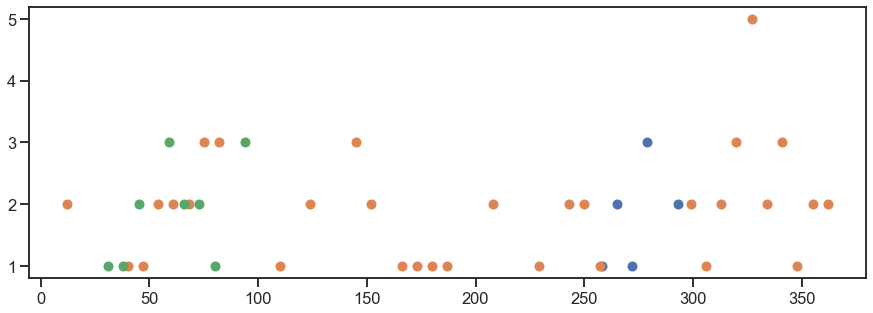

In [24]:
fig3, ax3 = plt.subplots(figsize=(15,5));

plt.plot(piv[piv!=0],'o');

# il faut lisser sur 7 jours mdr x)
# vérifier les dates

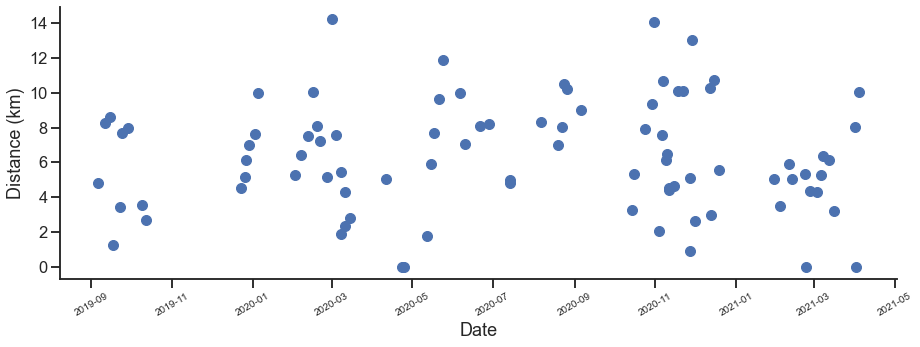

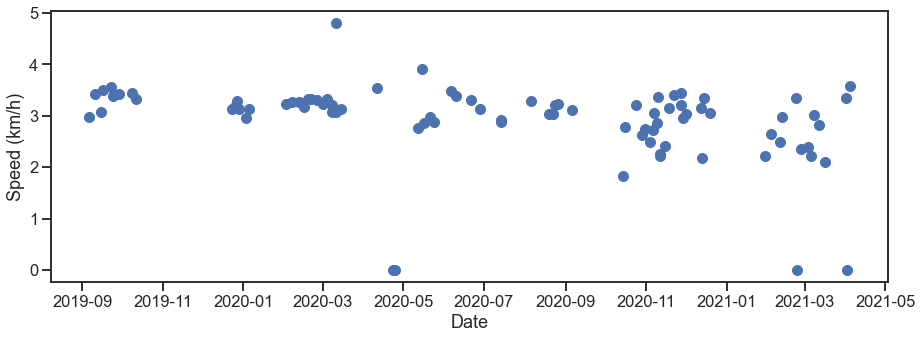

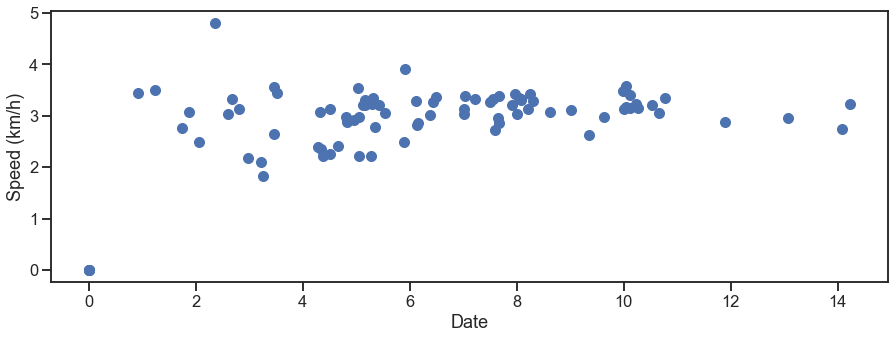

In [25]:
#V3
fig3, ax3 = plt.subplots(figsize=(15,5))

R=runs.distance/1000;
M=runs.average_speed;
D=runs.start_date_local;

# plot the figure
plt.plot_date(D,R,'o',ms=10,fillstyle='full')
#plt.fill_between(D, R,alpha=0.30)
plt.xlabel('Date')
plt.ylabel('Distance (km)')

ax3.xaxis.set_tick_params(rotation=30, labelsize=10)
ax3.xaxis.axis_name = 'Date'
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

plt.subplots(figsize=(15,5))
plt.plot_date(D,M,'o',ms=10,fillstyle='full')
#plt.fill_between(D, R,alpha=0.30)
plt.xlabel('Date')
plt.ylabel('Speed (km/h)')

ax3.xaxis.set_tick_params(rotation=30, labelsize=10)
ax3.xaxis.axis_name = 'Date'
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

plt.subplots(figsize=(15,5))
plt.plot(R,M,'o',ms=10,fillstyle='full')
#plt.fill_between(D, R,alpha=0.30)
plt.xlabel('Date')
plt.ylabel('Speed (km/h)')

ax3.xaxis.set_tick_params(rotation=30, labelsize=10)
ax3.xaxis.axis_name = 'Date'
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


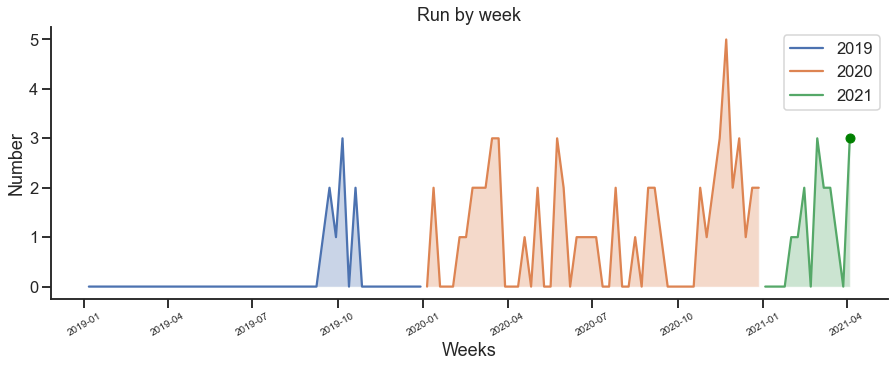

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


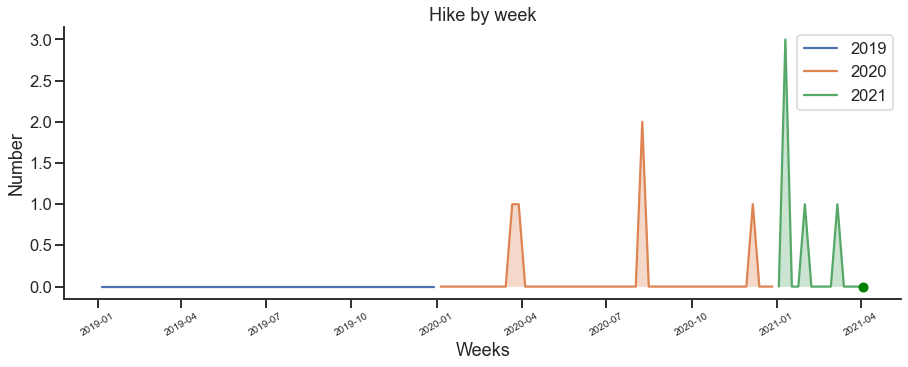

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


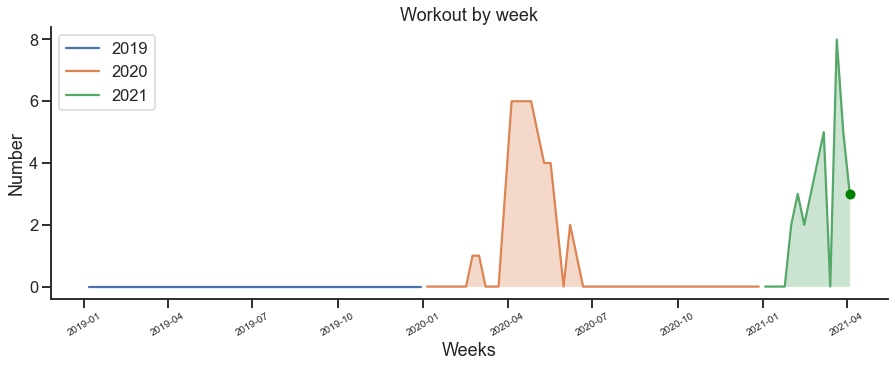

In [26]:
#V2


def PlotActivite(activities,NomActivite):
    fig2, ax2 = plt.subplots(figsize=(15,5))
    Y=[2019,2020,2021];

    # Number of the current week
    a = datetime.now()
    cw = a.isocalendar()[1]
    cy = a.isocalendar()[0]
    
    runs = activities.loc[activities['type'] == NomActivite]
    runs.loc[:,'start_date_local']=pd.to_datetime(runs.start_date_local)
    runs=runs.assign(dayofyear=runs['start_date_local'].dt.dayofyear)
    runs=runs.assign(weekofyear=runs['start_date_local'].dt.weekofyear)
    runs=runs.assign(year=runs['start_date_local'].dt.year)
    #print(runs)
    for yy in Y:
        R=runs[runs.year==yy];
        # compter le nombre de sorties par semaine
        if yy==cy:
            Nw = cw
        else :
            Nw = 52
        
        NbSortieperWeek= np.zeros((Nw,1));
        dateList = []
        for ii in range(0,Nw):
            NbSortieperWeek[ii]=len(R[R.weekofyear==ii]);
            mydate=datetime.strptime( str(yy)+' '+ str(ii) + ' 0', "%Y %W %w")
            dateList.append(mydate)
        # plot the figure
        plt.plot_date(dateList,NbSortieperWeek,label=yy,ls='-',ms=0,fillstyle='full')
        plt.fill_between(dateList, np.squeeze(NbSortieperWeek),alpha=0.30)

    l=len(dateList)
    plt.plot_date(dateList[l-1],NbSortieperWeek[l-1],'o',color='green')
    
    plt.xlabel('Weeks')
    plt.ylabel('Number')
    plt.title(NomActivite +' by week')
    plt.legend()

    ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
    ax2.xaxis.axis_name = 'Date'
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)

    month_day_fmt = mdates.DateFormatter('%b %d') # "Locale's abbreviated month name. + day of the month"
    ax.xaxis.set_major_formatter(month_day_fmt)

    plt.show()
    
PlotActivite(activities,'Run')
PlotActivite(activities,'Hike')
PlotActivite(activities,'Workout')

In [27]:
runs = activities.loc[activities['type'] == 'Run']
#runs.start_date_local= pd.to_datetime(runs.start_date_local)
print(runs.start_date_local)
runs.start_date_local=pd.to_datetime(runs.start_date_local)
runs.loc[:,'start_date_local']=pd.to_datetime(runs.start_date_local)
#runs=runs.assign(dayofyear=runs['start_date_local'].dt.dayofyear)
#runs=runs.assign(weekofyear=runs['start_date_local'].dt.weekofyear)
#runs=runs.assign(year=runs['start_date_local'].dt.year)

4      2021-04-04
6      2021-04-02
8      2021-04-01
22     2021-03-16
24     2021-03-12
          ...    
187    2019-09-23
188    2019-09-17
189    2019-09-15
190    2019-09-11
191    2019-09-06
Name: start_date_local, Length: 87, dtype: object


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Test\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
